In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
from yellowbrick.classifier import ROCAUC
from sklearn import svm
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

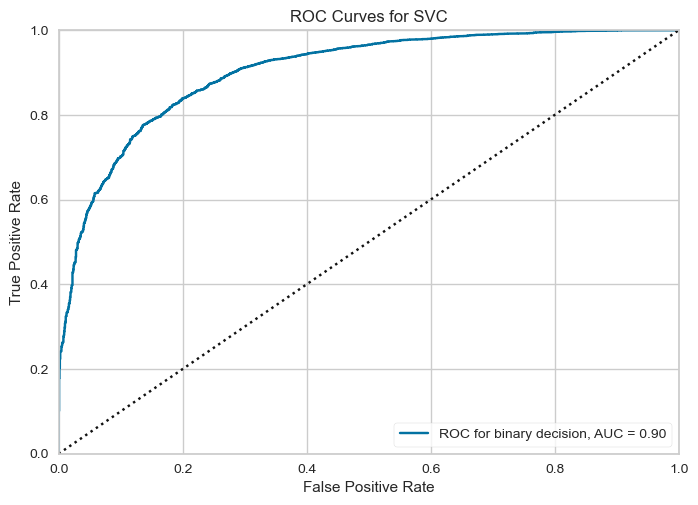

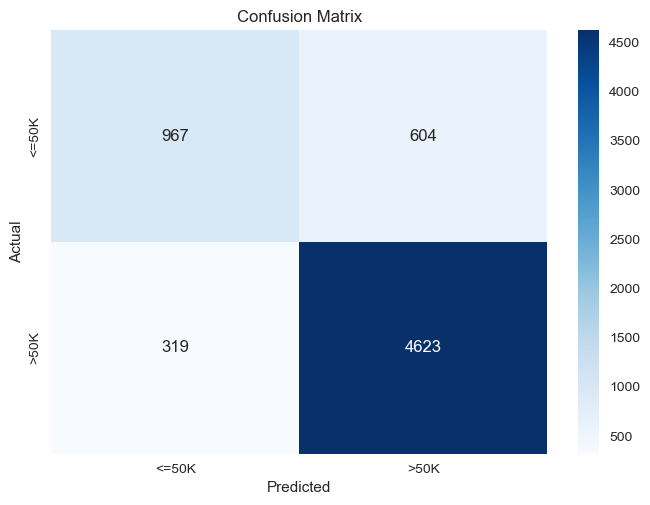

In [14]:
df = pd.read_excel('Adult_database(3) 2.xlsx')
print(df)
X = df.drop("income", axis=1)
y = df["income"]
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to be one-hot encoded
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

# Create a ColumnTransformer to apply one-hot encoding and feature scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), categorical_cols),
        ("scaling", StandardScaler(), [col for col in X.columns if col not in categorical_cols])
    ])

# Apply the preprocessing steps to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_prediction = svm_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# Evaluate the model using visualizers
visualizer = ROCAUC(svm_model,binary=True)
visualizer.fit(X_train_preprocessed, y_train)
visualizer.score(X_test_preprocessed, y_test)
visualizer.show()

# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
target_labels = ['<=50K', '>50K']

fig, ax = plt.subplots()
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels)

plt.show()


/Users/anishmuralidharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8361738062336864
Precision: 0.6774647887323944
Recall: 0.6123488224061108
F1 Score: 0.6432631227014376
Confusion Matrix:
[[ 962  609]
 [ 458 4484]]


/Users/anishmuralidharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


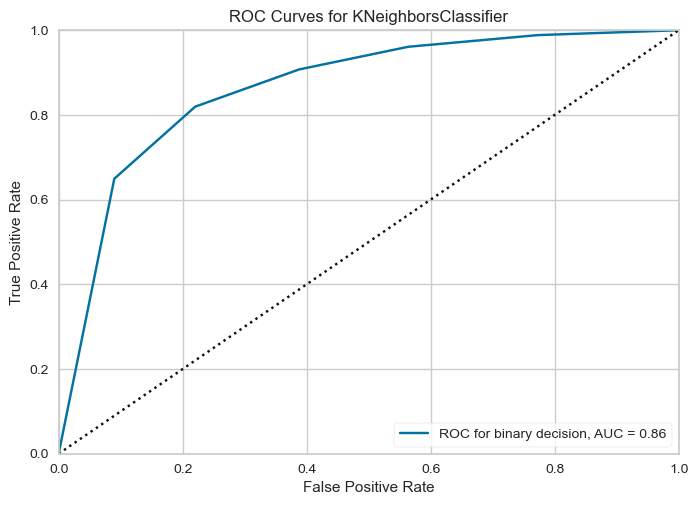

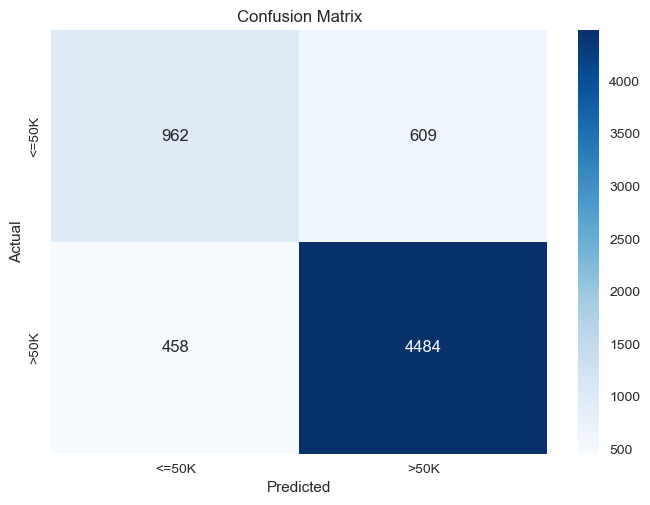

In [12]:
df = pd.read_excel('Adult_database(3) 2.xlsx')



# Preprocess the dataset
# Handle missing values, encode categorical variables, etc.
# ...

# Split the dataset into features (X) and target variable (y)
X = df.drop("income", axis=1)
y = df["income"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to be one-hot encoded
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

# Create a ColumnTransformer to apply one-hot encoding and feature scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), categorical_cols),
        ("scaling", StandardScaler(), [col for col in X.columns if col not in categorical_cols])
    ])

# Apply the preprocessing steps to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label=0)
recall = recall_score(y_test, y_pred,pos_label=0)
f1 = f1_score(y_test, y_pred,pos_label=0)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# Evaluate the model using visualizers
visualizer = ROCAUC(knn_model, binary=True)
visualizer.fit(X_train_preprocessed, y_train)
visualizer.score(X_test_preprocessed, y_test)
visualizer.show()

# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
target_labels = ['<=50K', '>50K']

fig, ax = plt.subplots()
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels)

plt.show()



Accuracy: 0.8582834331337326
Precision: 0.7519440124416796
Recall: 0.6155315085932527
F1 Score: 0.6769338466923346
Confusion Matrix:
[[ 967  604]
 [ 319 4623]]


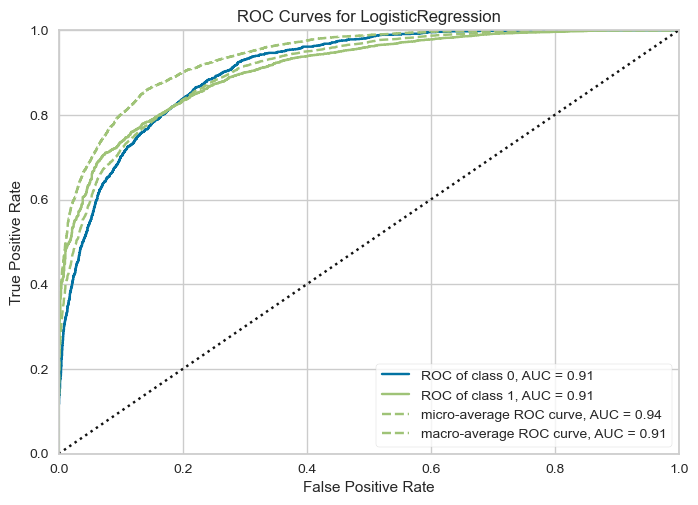

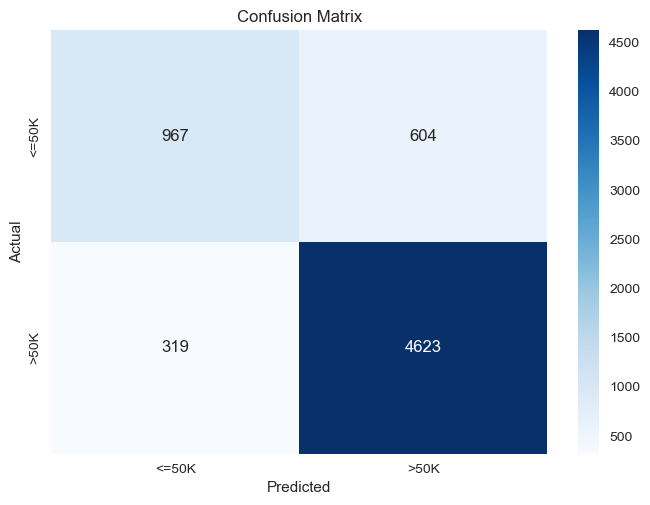

In [13]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("income", axis=1)
y = df["income"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to be one-hot encoded
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

# Create a ColumnTransformer to apply one-hot encoding and feature scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), categorical_cols),
        ("scaling", StandardScaler(), [col for col in X.columns if col not in categorical_cols])
    ])

# Apply the preprocessing steps to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# Evaluate the model using visualizers
visualizer = ROCAUC(logreg)
visualizer.fit(X_train_preprocessed, y_train)
visualizer.score(X_test_preprocessed, y_test)
visualizer.show()

# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
target_labels = ['<=50K', '>50K']

fig, ax = plt.subplots()
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels)

plt.show()
